# Handson 07 - Python
## Pulse Code Modulation (PCM) 


O PCM é a técnica de codificação por forma de onda que transforma um sinal analógico (caracterizados pela sua amplitude que pode assumir qualquer valor num intervalo) em um sinal digital, de tal maneira que na transformação analógico digital é realizada duas etapas:
- **Filtro passa baixa :** Limita a banda de frequência
- **Amostragem:** Transformar um sinal no tempo contínuo  em sinal discreto.
- **Quantização:** Atribuir bits de maneira igualitária para todas as amplitudes do sinal que se digitaliza. 
- ** Codificador:**  Transforma sinal analógico pulsos elétricos binário.

A digitalização de sinais promove algumas vantagens em relação à comunicação analógica:
- Um sinal digital é capaz de suportar muito mais ruído e distorções do que um canal analógico (dentro de certos limites), aumentando sua confiabilidade. Ou seja, sinal quantizado por mais que o ruído perturbe a natureza da onda, seus valores de amplitudes são pré-definidos sendo possível recuperar o sinal original. Isso possibilita o uso de regeneradores de sinal em uma comunicação ponto a ponto com uma baixíssima taxa de erro.
- Maior facilidade na multiplexação de sinais, bem como maior eficiência.
- Maior facilidade no armazenamento em relação aos sinais analógicos

Amostragem: Visualização no tempo e na frequência
A primeira etapa da codificação PCM é a amostragem. Para que a amostragem seja feita sem corromper o sinal original é necessário obedecer algumas regras. Pelo teorema de Nyquist, dado um sinal $x(t)$ com banda de frequência $B$ desde que a frequência de amostragem seja o dobro da largura de banda ($f_{s}\geq 2B$ ) é possível recuperar o sinal no tempo perfeitamente a partir do sinal amostrado.

No Matlab quando definimos uma função seno, por exemplo:

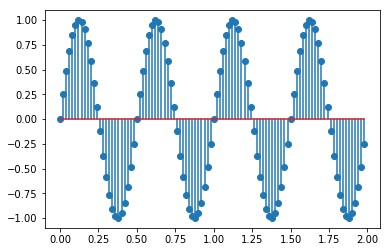

In [14]:
import numpy as np
from matplotlib import pyplot as plt

t = np.arange(0,2,0.02)
x = np.sin(t*2*np.pi*2)
plt.stem(t,x)
plt.show()

A função $m(t)$ descrita acima não é contínua no tempo e sim discreta. Isso ocorre porque a função plot() faz a ligação entre cada ponto que $m(t)$ está definido com retas. Se quiséssemos $m(t)$ para $t=$ 0.01, simplesmente não existiria. O sinal senoidal descrito acima portanto é tido como um sinal discreto.
### Amostragem retornando para zero
Como queremos simular um sinal $m(t)$ qualquer, faremos a amostragem do sinal (que já é discreto), porém fazendo amostras e retornando para zero (simulando trem de pulsos). Para isso, faremos um outro amostrador que coletará uma amostra a cada 10 amostras que passar. 
Faremos a amostragem do sinal via função downsample() seguida de upsample(). 

-** Downsample :** Coleta amostras em um intervalo de N elementos: <br>
Na biblioteca numpy, existe a função resample, que retorna um resultado semelhante ao necessário, mas os parâmetros não são tão intuitivos como o do Matlab. Por isso, usaremos a própria sintaxe do Python para indexar o vetor e obter os valores que queremos:


In [15]:
import numpy as np
x = np.linspace(0,100,101)
N = 10
print(x[::N])

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


- ** Upsample :**  Preenche espaços do vetor com zeros a cada N elementos. Será necessário implementar a função, como mostrado abaixo:

In [16]:
n = 3
y = np.zeros(n*len(x))
y[::n] = x 
#print(y)

#vamos criar as funções, por questão de organização

def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret



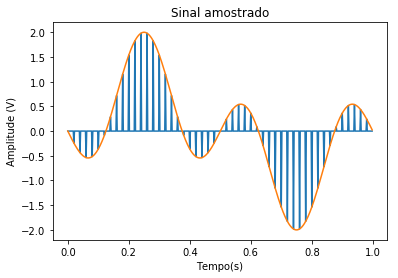

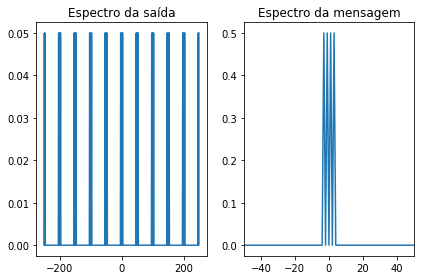

In [17]:
# Amostragem.m
## Parâmetros
import numpy as np
from scipy.fftpack import fft, fftshift
T=0.002                                                 # Taxa de amostragem (500kHz)
Tf=1                                                    # Tempo final em segundos
t= np.arange(0,Tf,T)        # Definição do eixo do tempo      
fm1=3                                                   # Frequência senoide 1      
fm2=1                                                   # Frequência senoide 2
m_t=np.sin(2*np.pi*fm2*t)-np.sin(2*np.pi*fm1*t)                     # Sinal mensagem m(t)
ts=0.02                                                 # Nova taxa de amostragem
N_samp=round(ts/T)                                      # Número de elementos 
L=16                                                    # Níveis de quantização
# T/ts deve inteiro, caso contrário, não funcionará a amostragem.

## Amostragem 
s_out=downsample(m_t,N_samp)                            # Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out=upsample(s_out,N_samp)                            # Retorna vetor amostrado com o numero inicial de elementos

## Espectro
lfft=len(m_t)                                        # Comprimento da fft
M_f=fftshift(fft(m_t,lfft)/lfft)                        # Sinal m_t na frequência 
S_out=fftshift(fft(s_out,lfft)/lfft)                    # Sinal s_out na frequência
Fs=1/T 
freq = np.arange(-Fs/2,Fs/2,Fs/lfft)

#plotting

import matplotlib.pyplot as plt
plt.plot(t,s_out,t,m_t)
plt.title("Sinal amostrado")
plt.xlabel("Tempo(s)")
plt.ylabel("Amplitude (V)")
plt.figure(1,[10,7])
plt.show()
plt.subplot(121)
plt.plot(freq,np.abs(S_out))
plt.title("Espectro da saída")

plt.subplot(122)
plt.plot(freq,np.abs(M_f))
plt.xlim([-50,50])
plt.title("Espectro da mensagem")

plt.tight_layout()
plt.show()

Perceba que o sinal resultante é do tipo PAM (Pulse Amplitude Modulation) cujos pulsos são extremamente estreitos.

- **Se antes estávamos fazendo amostragem de um sinal qualquer $m(t)$ e não aparecia frequências laterais, então de onde surgiu essas frequências???**

Simples! A amostragem antes era feita em um vetor de tempo $t$ onde todo elemento de $t$ tinha uma amostra de $m(t)$. Nessa amostragem, como queremos simular a amostragem real. Se $t$ fosse contínuo de verdade, nem todo elemento teria amostras de $m(t)$. De forma mais clara, antes apenas amostrávamos o sinal, agora amostramos o sinal e voltamos para zero em todos os outros elementos de $t$ simulando as regiões que não ocorreu a amostragem de verdade.

### Visualização do sinal no tempo e frequência para várias taxas de amostragem (teorema de Nyquist):

A amostragem ocorre como a multiplicação de trem de pulsos em pontos definidos formando no eixo da frequência o surgimento de frequências laterais. Quando tem-se uma frequência de amostragem menor que duas vezes a frequência máxima $F_{s}\leq 2f_{m}$, ocorre a sobreposição entre essas frequências, tornando o sinal resultante impossível de ser reconstruído. Porém, quanto maior a frequência de amostragem, mais "longe" ela fica da frequência em banda base, podendo ser reconstruído o sinal perfeitamente sem distorção para qualquer valor maior que a taxa de Nyquist. Por questão de custos, costuma-se assumir a frequência de amostragem como $F_{s}\approx2.2f_{m}$.

Devemos também levar em conta que, seja m(t) um sinal com frequência de 25Hz com 1000 amostras e frequência de amostragem de 500Hz, quando amostramos o sinal retornando a zero pulando 10 elementos é como se a frequência de amostragem fosse de 10x menor que a frequência real. Isso provoca uma mudança séria na hora da amostragem, pois a frequência mínima agora de amostragem será 50 Hz. Faremos então no script:

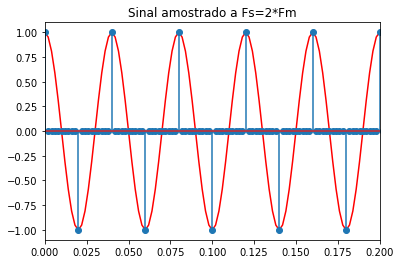

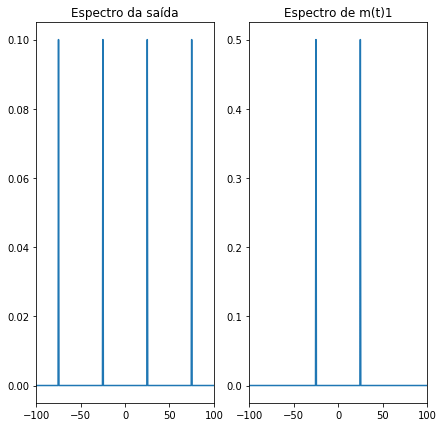

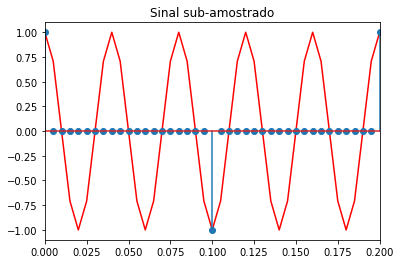

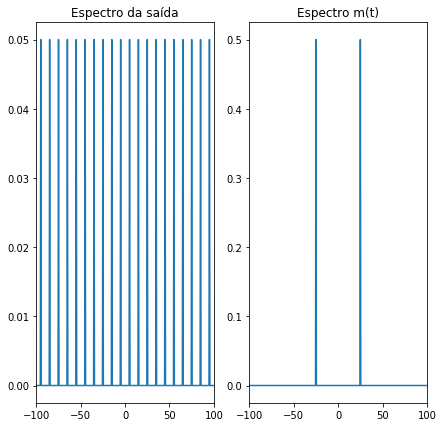

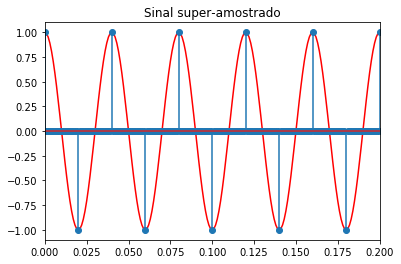

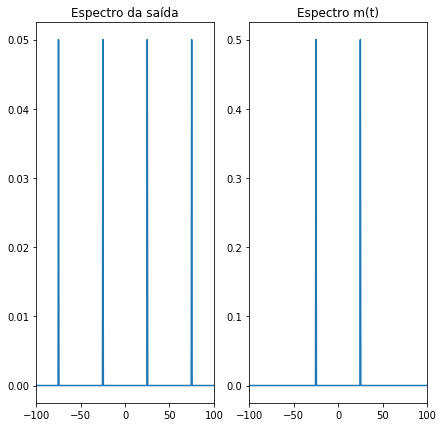

In [18]:
## Parâmetros
# Nessa simulação faremos 
# 1- Fs = 2*Fm - Sinal amostrado na frequencia mínima
# 2- Fs > 2*Fm - Sinal Sub-amostrado
# 3- Fs < 2*Fm - Sinal Sobre-amostrado
# Amostragem
Tf=2                                                    # Tempo final em segundos
# Eixo do tempo 1
Fs1=500                                                 # Frequência de amostragem   -- 1
t1=np.arange(0,Tf,1/Fs1)                                    # Definição do eixo do tempo -- 1
# Eixo do tempo 2
Fs2=200                                                 # Frequência de amostragem   -- 2
t2=np.arange(0,Tf,1/Fs2)                             # Definição do eixo do tempo -- 2
# Eixo do tempo 3
Fs3=1000                                                # Frequência de amostragem   -- 3
t3=np.arange(0,Tf,1/Fs3)                                    # Definição do eixo do tempo -- 3
# Senoide
fm=25                                                   # Frequência senoide
m_t1=np.cos(2*np.pi*fm*t1)                                    # Sinal mensagem m1(t)
m_t2=np.cos(2*np.pi*fm*t2)                                    # Sinal mensagem m2(t)
m_t3=np.cos(2*np.pi*fm*t3)                                    # Sinal mensagem m3(t)
n=10                                                    # Número de elementos pulados
# T/ts deve ter resto = 0, caso contrário, não funcionará.

## Amostragem 
# Amostragem 1
s_out1=downsample(m_t1,n)                               # Pula N_samp=10 amostras do vetor s_out    
s_out1=upsample(s_out1,n)                               # Retorna vetor amostrado com o numero inicial de elementos
#s_out=min(m_t,t1) 
# Amostragem 2
s_out2=downsample(m_t2,n)                               # Pula N_samp=10 amostras do vetor s_out    
s_out2=upsample(s_out2,n)                               # Retorna vetor amostrado com o numero inicial de elementos
# Amostragem 1
s_out3=downsample(m_t3,n)                               # Pula N_samp=10 amostras do vetor s_out    
s_out3=upsample(s_out3,n)                               # Retorna vetor amostrado com o numero inicial de elementos

## Espectro da frequência
# Eixo da frequência 1
lfft1=len(m_t1)                                      # Comprimento da fft
M_f1=fftshift(fft(m_t1,n=lfft1,axis=0)/lfft1)                    # Sinal m_t na frequência 
S_out1=fftshift(fft(s_out1,lfft1)/lfft1)                # Sinal s_out na frequência
freq1=np.arange(-Fs1/2,Fs1/2,Fs1/lfft1)                  # Eixo da Frequência

# Eixo da frequência 2
lfft2=len(m_t2)                                      # Comprimento da fft
M_f2=fftshift(fft(m_t2,lfft2)/lfft2)                    # Sinal m_t na frequência 
S_out2=fftshift(fft(s_out2,lfft2)/lfft2)                # Sinal s_out na frequência
freq2=np.arange(-Fs2/2,Fs2/2,Fs2/lfft2)                  # Eixo da Frequência
# Eixo da frequência 3
lfft3=len(m_t3)                                      # Comprimento da fft
M_f3=fftshift(fft(m_t3,lfft3)/lfft3)                    # Sinal m_t na frequência 
S_out3=fftshift(fft(s_out3,lfft3)/lfft3)                # Sinal s_out na frequência
freq3=np.arange(-Fs3/2,Fs3/2,Fs3/lfft3)                  # Eixo da Frequência

# plotting

from matplotlib import pyplot as plt

plt.plot(t1,m_t1,'r')
plt.stem(t1,s_out1)
plt.xlim([0,0.2])
plt.title("Sinal amostrado a Fs=2*Fm")
plt.show()

plt.figure(1,[7,7])
plt.subplot(121)
plt.plot(freq1,np.abs(S_out1))
plt.title("Espectro da saída")
plt.xlim([-100,100])

plt.subplot(122)
plt.plot(freq1,np.abs(M_f1))
plt.title("Espectro de m(t)1")
plt.xlim([-100,100])

plt.show()

plt.plot(t2,m_t2,'r')
plt.stem(t2,s_out2)
plt.title("Sinal sub-amostrado")
plt.xlim([0,0.2])

plt.show()

plt.figure(1,[7,7])
plt.subplot(121)
plt.title("Espectro da saída")
plt.plot(freq2,np.abs(S_out2))
plt.xlim([-100,100])

plt.subplot(122)
plt.title("Espectro m(t)")
plt.plot(freq2,np.abs(M_f2))
plt.xlim([-100,100])

plt.show()

plt.plot(t3,m_t3,'r')
plt.title("Sinal super-amostrado")
plt.stem(t3,s_out3)
plt.xlim([0,0.2])

plt.show()

plt.figure(1,[7,7])
plt.subplot(121)
plt.title("Espectro da saída")
plt.plot(freq3,np.abs(S_out3))
plt.xlim([-100,100])

plt.subplot(122)
plt.title("Espectro m(t)")
plt.plot(freq3,np.abs(M_f3))
plt.xlim([-100,100])

plt.show()

### Reconstrução ideal do sinal amostrado para várias taxas de Nyquist 
Para entender como funciona o processo de reconstrução de um sinal $m(t)$ qualquer, é necessário estar claro:
- **Filtros:**
Filtrar frequências indesejadas em um sinal amostrado torna-se bastante simples quando pensamos em um filtro passa baixa, cuja banda é exatamente a frequêcia que queremos filtrar (com uma certa margem). Entende-se como filtro uma janela (retângulo, degrau, ...) na frequência com largura de banda determinada. Esses filtros quando passado para o domínio do tempo, obtêm-se sinais do tipo sinc() que nada mais é que:
$$ sinc(x)=\frac{sen(x)}{x}$$

Isso significa que se convoluirmos o sinal $sinc()$ com os argumentos corretos de banda, com o sinal amostrado obteremos novamente o sinal inicial.

- **Convolução:**  
Mede a área subentendida pela superposição de dois sinais em função do deslocamento existente entre eles.
$$ w(k)=u(j)*v(j)=\sum_{j}^{} u(j)\cdot v(k-j+1)$$
De tal forma que, se n = length(u) e m = length(v), w é um vetor de comprimento length(w)=m+n-1.

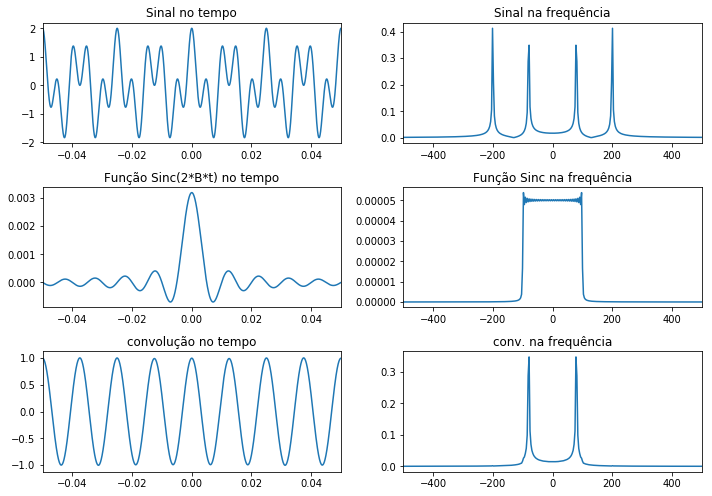

In [19]:
# Filtro.m
from scipy.fftpack import fft, fftshift
import numpy as np
## Parâmetros da Sinc
B=100                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                            # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                          # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)                           # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                                # Calcula a convolução
#c=c(1,(length(t)-1)/2:3*(length(t)-1)/2)         # Ajusta o tamanho do vetor (/2)
c = c[(len(t))//2:3*(len(t))//2]    
## Espectros de frequência
lfft=len(s)                                             # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)                # Eixo da frequência

from matplotlib import pyplot as plt

plt.figure(1,[10,7])

plt.subplot(321)
plt.title("Sinal no tempo")
plt.plot(t,m)
plt.xlim([-0.05,0.05])

plt.subplot(322)
plt.title("Sinal na frequência")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])

plt.subplot(323)
plt.title("Função Sinc(2*B*t) no tempo")
plt.plot(t,s)
plt.xlim([-0.05,0.05])


plt.subplot(324)
plt.title("Função Sinc na frequência")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])

plt.subplot(325)
plt.title("convolução no tempo")
plt.plot(t,c)
plt.xlim([-0.05,0.05])


plt.subplot(326)
plt.title("conv. na frequência")
plt.plot(freq,np.abs(C))
plt.xlim([-500,500])


plt.tight_layout(pad=1.1)
plt.show()


Conhecido o método de filtragem, agora faremos sua aplicação para sinais amostrados. Realizar a filtragem do sinal original e transformar em um sinal contínuo no tempo novamente requer a filtragem de suas componentes laterais. Um filtro ideal (ou muito próximo) $H(f)$ pode ser entendido como um retângulo na frequência que quando multiplicado com o sinal $M(f)$ terá componentes de frequência apenas onde o filtro for diferente de zero. Logo, convoluindo um filtro no tempo com um sinal $m(t)$ qualquer, espera-se que seja filtrado as frequências além da banda do filtro. Faremos então a filtragem de um sinal pela convolução com uma sinc() (Filtro).

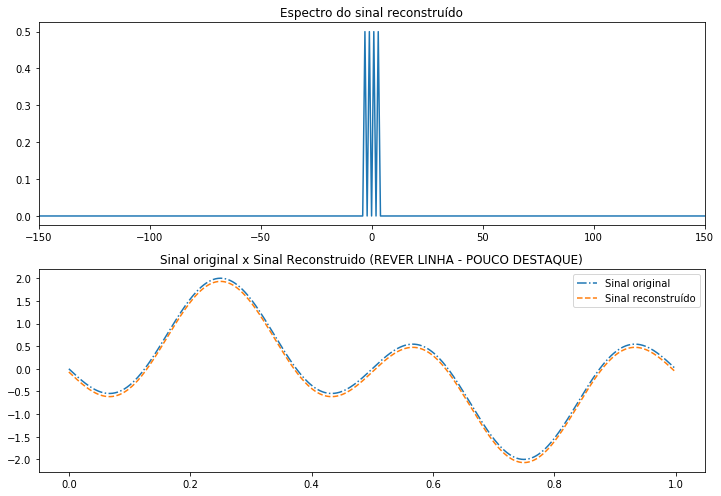

In [25]:
# Reconstrucao_FPB
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
## Parâmetros 
# Coletaremos todos os dados do processo de quantização e amostragem para 
# que o código não fique extenso. Todas as variáveis terão o mesmo nome.
# O arquivo .mat deve sempre está na pasta em que o script está.
variaveis = loadmat('handsOn7_matlab_codes/Amostragem.mat')
T = variaveis['T']
lfft = int(variaveis['lfft'])
N_samp = variaveis['N_samp']
S_out = variaveis['S_out']
## Reconstrução via filtro passa baixa
# Largura máxima de banda do filtro é dada por Bw = floor((lfft/N_samp)/2)
Fmax=1/(2*T)                                                   # Frequência máxima dada por Fs/2
BW=10                                                          # Largura de banda de 10

m_t = variaveis['m_t'].flatten()

t = variaveis['t']
t = np.transpose(t)

freq = variaveis['freq']

# Filtro
H_lpf=np.zeros(lfft)                                            # Zera vetor filtro
H_lpf[lfft//2-BW:lfft//2+BW-1]=1                                 # Define 1 na frequencia desejada
S_recv=N_samp*S_out*H_lpf                                     # Filtragem ideal
s_recv=np.real(ifft(fftshift(S_recv)))                            # Reconstroi o sinal no tempo
#print(s_recv,s_recv.shape)
#s_recv=s_recv[0:lfft]          # Corrige numero de elementos 
s_recv=s_recv*np.max(m_t)/np.max(s_recv)                           # Dá ganho pro sinal reconstruido
s_recv = np.transpose(s_recv)

## Plotting
plt.figure(1,[10,7])
# Plota o sinal reconstruído por um filtro passa baixa ideal no domínio da frequência
plt.subplot(211)
plt.title("Espectro do sinal reconstruído")

S_recv = S_recv.flatten()
freq = freq.flatten()
plt.plot(freq,np.abs(S_recv))
plt.xlim([-150,150])

plt.subplot(212)
plt.title("Sinal original x Sinal Reconstruido (REVER LINHA - POUCO DESTAQUE)")
plt.plot(t,m_t,'-.',t,s_recv[:lfft]-0.07,'--') # subtração só para melhorar a visualiz.
plt.legend(["Sinal original","Sinal reconstruído"])

plt.tight_layout()
plt.show()


#print(s_recv.shape,t.shape)

# Plota sinal recuperado na frequência

A outra forma de reconstruir um sinal é pelo somatório de sincs (Convolução):

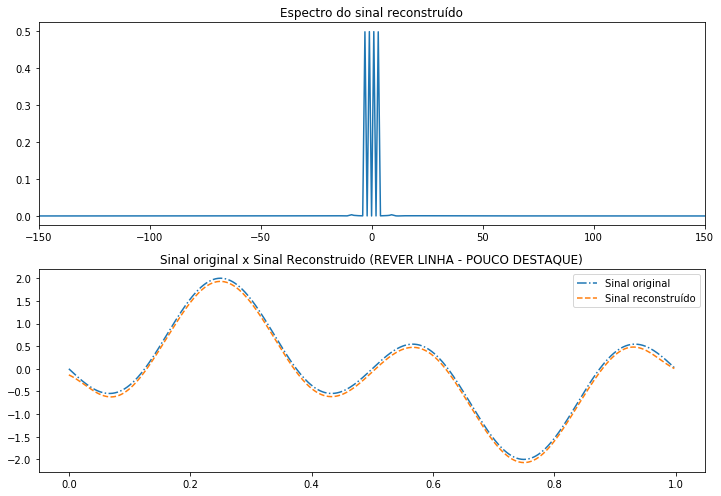

In [23]:
## Reconstrução via Sincs
s_out = np.transpose(variaveis['s_out'])
T = variaveis['T']
nSamples = len(s_out)                           # Mede-se o comprimento do sinal
xSamples = np.arange(0,nSamples)   # Vetor ordenado de amostras
Tf = variaveis['Tf']
trec = nSamples/Tf*np.arange(0,Tf,T) # Eixo do tempo do sinal recuperado
Tsinc = 0.002                                                   # Passo de tempo da sinc
Tfsinc = 50                                                     # Tempo Final da sinc
tsinc = np.arange(0,Tfsinc,Tsinc)             # Eixo de tempo da sinc
tsinc = tsinc.flatten()
s_recv=0                                                        # Cria o vetor da reconstrução
Bs = fm1 = variaveis['fm1']                                                       # Banda da transmissão

# Gera laço para somatório
for ik in xSamples:      
    Nx_sinc = s_out[ik]*np.sinc(2*np.pi*Bs*(tsinc-ik*T))                # Cria sinc para a amostra ik
    s_recv = s_recv+Nx_sinc                                         # Faz somatórios das sincs

s_recv=s_recv[0:lfft]                                           # Corrige comprimento do vetor
s_recv=s_recv*(np.max(m_t)/np.max(s_recv))                            # Ajusta o ganho

## Plotting
plt.figure(1,[10,7])
# Plota o sinal reconstruído por um filtro passa baixa ideal no domínio da frequência
plt.subplot(211)
plt.title("Espectro do sinal reconstruído")

S_recv = fftshift(fft(s_recv,lfft)/lfft)
S_recv=np.transpose(S_recv)
freq=freq.flatten()
plt.plot(freq,np.abs(S_recv))
plt.xlim([-150,150])
s_recv=s_recv.flatten()
plt.subplot(212)
plt.title("Sinal original x Sinal Reconstruido (REVER LINHA - POUCO DESTAQUE)")
plt.plot(t,m_t,'-.',t,s_recv[:lfft]-0.07,'--') # subtração só para melhorar a visualiz.
plt.legend(["Sinal original","Sinal reconstruído"])

plt.tight_layout()
plt.show()


### Quantização: parâmetros, erro de quantização e qualidade: CORREÇÃO PENDENTE
Na quantização, limitamos a amplitude do sinal de mensagem em ($-m_{p},m_{p}$) e qualquer amostra qualquer de $m(t)$ é aproximada ao nível de quantização mais próximo dela. Nota-se também que $m_{p}$ não é necessariamente a amplitude de pico do sinal e as amplitudes que ultrapassarem este pico são truncadas. Portanto, conclui-se que $m_{p}$ não é um parâmetro da onda e sim do quantizador. Conhecido o intervalo ($-m_{p},m_{p}$), divide por $L$ níveis uniformemente espaçados sendo cada um $\Delta_{v}=\frac{2m_{p}}{L}$.
Do ponto de vista prático, um sinal digital que pode ser representado em um número binário limitado é desejável devido a facilidade de implementação, sua simplicidade e melhor discriminação de ruido.

No script abaixo é mostrado cada etapa para quantizar um sinal $x(t)$ usando a função round() que retorna o número inteiro mais próximo. Obs: Quantização Linear (Sem distorcer amplitude) Por ser demonstrativo, faremos esse script usando todos os níveis detectando suas amplitudes e setando como o máximo do quantizador.

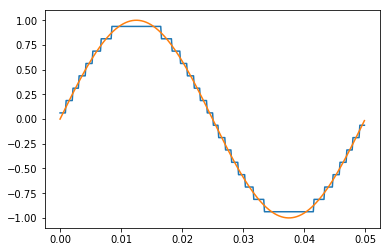

In [30]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                            # Frequência de amostragem
Ts=1/fs                                            # Período de amostragem
fm=20                                              # Frequência da onda
Tm=1/fm                                            # Período de amostragem
t= np.arange(0,Tm,Ts)                              # Eixo do tempo
x=np.sin(2*np.pi*20*t)                                   # Sinal x(t)
L=16                                               # Níveis de quantização
nbits=np.log2(L)       
sig_max=max(x)                                     # Encontra pico máximo
sig_min=min(x)                                     # Encontra pico mínimo
Delta=(sig_max-sig_min)/L                          # Intervalo de quantização (distância entre um nível e outro)
q_level=np.arange(sig_min+Delta/2,sig_max,Delta)      # Vetor com os Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

# Etapas para usar o round()
sigp=x-sig_min                                     # Joga sinal pra cima
sigp=sigp*(1/Delta)                                # Dá ganho de 1/Delta no sinal (elementos >= 0)
sigp=sigp+1/2   +0.0001                                   # Tira elementos do zero 
# Agora que nenhum valor do sinal  é zero nem negativo:
qindex=np.round(sigp)                      # Encontra inteiro mais proximo para cada elemento
qindex[qindex>16] = 16                      # Trunca o excedente de qindex (Ex: nível 17)
qindex = qindex.astype(int)
q_out=q_level[abs(qindex-1)]     # Distribui nos níveis cada elemento; abs() garante que o índice não será negativo

## Plotting
plt.plot(t,q_out,t,x)
plt.show()

Conhecida as etapas de quantização, faremos agora a quantização do sinal amostrado de Amostragem.mat, concluindo mais uma etapa do PCM. Faremos a quantização do sinal exatamente como fizemos para senóide anterior.

dict_keys(['M_f', 'm_t', 'S_out', '__version__', 'Fs', 's_out', 'fm1', 't', 'filename', 'Tf', 'ts', 'N_samp', 'L', 'freq', '__globals__', 'fm2', '__header__', 'lfft', 'T'])


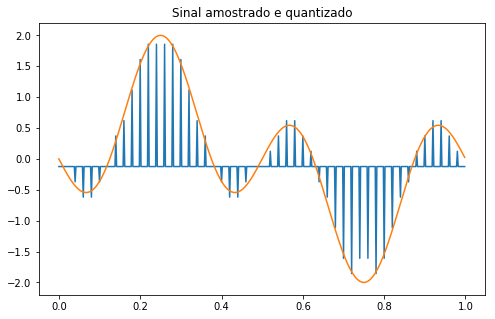

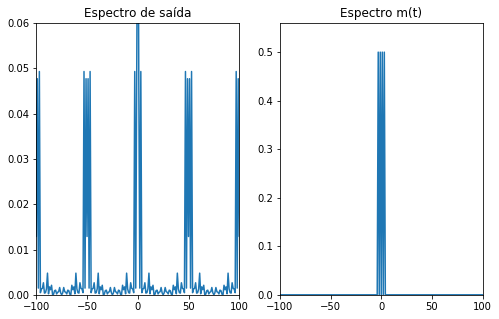

In [61]:
from scipy.io import loadmat
variaveis = loadmat('handsOn7_matlab_codes/Amostragem.mat')
print(variaveis.keys())
from scipy.fftpack import fft, ifft, fftshift
s_out = variaveis['s_out'].flatten() #garante que a saída é um vetor linha, evitando erros de dimensão

sig_max=np.max(s_out)                                         # Encontra pico máximo
sig_min=np.min(s_out)                                         # Encontra pico mínimo
Delta=(sig_max-sig_min)/L                                  # Intervalo de quantização (distância entre um nível e outro)
q_level=np.arange(sig_min+Delta/2,sig_max,Delta)           # Vetor com os Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

# Etapas para usar o round()
sigp=s_out-sig_min                                         # Joga sinal pra cima
sigp=sigp*(1/Delta)                                        # Dá ganho de 1/Delta no sinal
sigp=sigp+1/2                                              # Tira elementos do zero 
# Agora que nenhum valor do sinal agora é zero nem negativo:
qindex=np.round(sigp)                                         # Encontra inteiro mais proximo para cada elemento
qindex[qindex>16] = 16                                   # Remove o excedente de qindex (Ex: nível 17)
qindex = qindex.astype(int)
q_out=q_level[abs(qindex-1)]                                      # Distribui nos níveis cada elemento

## Espectro
lfft=len(q_out)                                         # Comprimento da fft
Q_out=fftshift(fft(q_out,lfft)/lfft)                       # Sinal s_out na frequência
#Freq ja vem no load

import matplotlib.pyplot as plt
freq = variaveis['freq'].flatten() #garante que a saída é um vetor linha, evitando erros de dimensão
t = variaveis['t'].flatten() #garante que a saída é um vetor linha, evitando erros de dimensão
plt.figure(1,[8,5])
plt.title("Sinal amostrado e quantizado")
plt.plot(t,q_out)
plt.plot(t,m_t)
plt.show()

M_f = variaveis['M_f'].flatten()

plt.figure(2,[8,5])
plt.subplot(121)
plt.title("Espectro de saída")
plt.plot(freq,np.abs(Q_out))
plt.axis([-100, 100, 0, 0.06])

plt.subplot(122)
plt.title("Espectro m(t)")
plt.plot(freq,np.abs(M_f))
plt.axis([-100, 100, 0, 0.56])


plt.show()


Como se pode ver, houve um erro claro referente a aproximação do sinal amostrado e quantizado com a onda original (picos além da amplitude correta), esse erro chamamos de "Erro de quantização".


###  Erro de quantização :
Na transformação  Analógico $\rightarrow $  Digital usando um número $n$ de bits resulta na limitação da amplitude do sinal em $2^{n}$ níveis de amplitude a serem representados. No receptor, para cada intervalo é recuperado um valor de sinal que corresponde ao valor médio de um intervalo de quantização (nível de quantização). Isto resulta em pequenos desvios em relação a amostra original do sinal. O desvio corresponde, no máximo, a meio intervalo para cada amostra, sendo denominado erro de quantização.

$$ - \frac{\Delta}{2} \leq \varepsilon \leq \frac{\Delta}{2} $$

O gráfico abaixo representa a aproximação de uma senóide em todos seus pontos para $n=3$ bits gerando $L=2^{3}=8$ níveis de quantização. (Quantizacao_sen_demo.m)
![Figura01](./handsOn7_matlab_figs/Quantizacao.jpg)

Quanto maior for o número de bits, melhor será a aproximação feita, ou seja menor o Erro/Ruido de Quantização. Mas a utilização de uma maior quantidade de níveis de quantização implica na necessidade de maior quantidade de bits para representar cada amostra digitalmente, isso significa maior necessidade de banda. A relação sinal/ruído de quantização (S/N) será a razão entre o valor eficaz da amplitude do sinal e o valor eficaz do erro introduzido.
$$ (\frac{S}{N})=20 \cdot log(\frac{\left |sig  \right|}{\left |sig - sig_{quant}  \right|})$$

Pode-se ver que relação sinal/ruido será maior (melhor) para maiores valores de amplitude e menor (pior) para menores valores de amplitude. 
Deve-se estar claro aqui a diferença entre ruido de quantização e o ruido referente ao meio de propagação!

Para o sinal amostrado e quantizado que trabalhamos nos tópicos anteriores, calcularemos a SQNR do sinal amostrado aplicando a fórmula:

In [63]:
from scipy.io import loadmat
import numpy as np
quantizacao_mat = loadmat('handsOn7_matlab_codes/Quantizacao.mat')
s_out = quantizacao_mat['s_out']
q_out = quantizacao_mat['q_out']
SQNR = 20*np.log10(np.linalg.norm(s_out)/np.linalg.norm(s_out-q_out))
print("SQNR =",SQNR)

SQNR = 8.39787853246


### Reconstrução do sinal amostrado e quantizado PENDENTE
Faremos o mesmo processo de reconstrução do sinal mostrado anteriormente, criamos um filtro com banda compatível e multiplicamos na frequência (ou convoluimos no tempo):

dict_keys(['Fs', 's_out', 'fm1', 't', 'filename', 'ts', 'sig_min', 'freq', '__header__', 'lfft', 'q_out', 'q_level', 'M_f', 'm_t', 'S_out', '__version__', 'sig_max', 'Tf', 'L', 'sigp', 'N_samp', 'qindex', '__globals__', 'fm2', 'Q_out', 'T', 'Delta'])


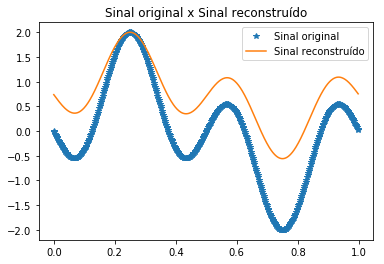

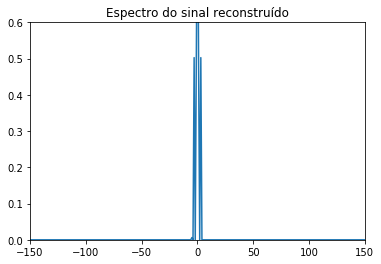

In [103]:
#não vamos importar o quantizacao.mat novamente, vide o bloco anterior
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
print(quantizacao_mat.keys())

T = float(quantizacao_mat['T'])
Fmax=1/(2*T)             # Frequência máxima dada por Fs/2
BW=5
t = quantizacao_mat['t'].flatten()
m_t = quantizacao_mat['m_t'].flatten()
lfft = int(quantizacao_mat['lfft'])
Q_out = quantizacao_mat['Q_out'].flatten()
N_samp = quantizacao_mat['N_samp']
# Largura de banda
# Filtro
H_lpf=np.zeros(lfft)                                            # Zera vetor filtro
H_lpf[lfft//2-BW:lfft//2+BW]=1                                 # Define 1 na frequencia desejada
S_recv=N_samp*Q_out*H_lpf   # Filtragem ideal
S_recv = S_recv.flatten()
s_recv=np.real(ifft(fftshift(S_recv)))         # Reconstroi o sinal no tempo
s_recv = s_recv.flatten()

s_recv=s_recv[:lfft]                                          # Corrige número de elementos 
#s_recv=s_recv-s_recv[0,0]                                         # Remove quaisquer componente DC
s_recv=s_recv*(np.max(m_t)/np.max(s_recv))          # Dá ganho pro sinal reconstruido

import matplotlib.pyplot as plt

plt.title("Sinal original x Sinal reconstruído")
plt.plot(t,m_t,'*')
plt.plot(t,s_recv)
plt.legend(["Sinal original","Sinal reconstruído"])
plt.show()

plt.title("Espectro do sinal reconstruído")
plt.plot(freq,np.abs(S_recv))
plt.axis([-150,150,0,.6])
plt.show()


### Codificação PCM
Dentre as diversas formas de codificação de linha, trataremos da mais básica conhecida como **On-Off**, a qual transmite 1 quando o pulso é positivo, e 0 na ausência de pulso. Em matlab, a função utilizada foi de2bin (Decimal-to-Binary) e bi2de (Binary-to-Decimal), já em Python foi utilizada a função numpy.binary_repr(), que não retorna a sequência de bits invertida, mas a retorna em forma de string ('str').

In [154]:
import numpy as np
x_binario = np.binary_repr(20) #decimal para binário
print(x_binario)
print(type(x_binario))


10100
<class 'str'>


Deve-se perceber que o retorno da função é exatamente a sequência de bits para o número 20 (decimal) na base 2. Para converter de binário para decimal, basta fazer:

In [111]:
x_decimal = int(x_binario,2) #binário para decimal
print(x_decimal)

20


100001
33


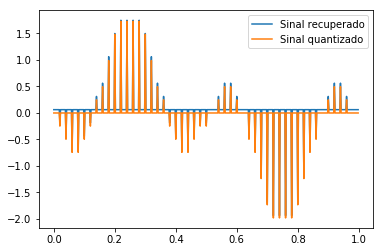

In [181]:
from scipy.io import loadmat
variaveis_quantizacao = loadmat('Quantizacao.mat')

#print(variaveis_quantizacao.keys())

q_out = variaveis_quantizacao['q_out'].flatten()
L = variaveis_quantizacao['L'].flatten()

import numpy as np
#codificando em binário
#colocando números em inteiros e positivos
sig_quan = q_out*L #coloca números inteiros
sig_quan = sig_quan - np.min(sig_quan) +1 #Todos os elementos positivos
sig_quan = np.round(sig_quan).astype(int) # Caso haja erros, regenera o sinal perfeitamente para inteiros
# a função map recebe dois parâmetros: uma função e um iterável, e aplica essa função a cada elemento do iterável
vet_bin  = map(np.binary_repr,sig_quan) #transforma para binário
# o retorno da função map é um 'map object', que é um iterável. devemos trabalhar, entretanto, com um array da numpy
# portanto, precisamos fazer uma conversão, via função np.fromiter() "from iterable"
vet_bin = np.fromiter(vet_bin,dtype=np.int)

##decodificando binários
#devemos converter os elementos de vet_bin de inteiros 
print(vet_bin[0])
#para evitar sintaxes e conversões complicadas, vamos usar um laço para recuperar o vetor:

vet_dec_rec = np.ndarray(len(vet_bin),dtype = np.int) #criamos um vetor vazio com o mesmo tamanho de vet_bin, tipo inteiro

for i in range(len(vet_dec_rec)):
    vet_dec_rec[i] = int(str(vet_bin[i]),2) 

#lembrando que, para converter de binário para decimal com o "casting" int(numero,base), a variável 'numero'
# precisa ser uma string ('str')
    

revert = vet_dec_rec/L - 2 #desfaz os ajustes da codificação

import matplotlib.pyplot as plt
plt.plot(t,revert,t,q_out)
plt.legend(["Sinal recuperado","Sinal quantizado"])
plt.show()

O sinal decodificado está claramente deslocado (Componente DC) devido a alguns ajustes e a função round, porém isso não é problema pois este sinal ainda passará pelo processo de filtragem que eliminará esta componente.

### Multiplexação e demultiplexação (TDM)
Vários sinais de baixa taxa de bits podem ser multiplexados ou combinados para formar um sinal a uma taxa de bits mais elevada para poder ser transmitido em alta frequência por divisão no tempo. Esse processo de transmissão de dados dividindo o tempo chama-se Multiplexação. Há basicamente duas formas de multiplexar dois ou mais sinais no tempo.
- Enlaçamento de bits: Alterna-se sequencialmente os bits de cada sinal. 
- Enlaçamento de palavras: Alterna-se sequencialmente um grupo de "N" bits.

Na multiplexação é estabelecida a distância entre uma amostra de N bits e a amostra do sinal sinal subsequênte. 
Nesse HandsOn faremos a multiplexação de dois sinais em binário simulando uma transmissão e recepção sem perdas nem ruídos.

In [23]:
import numpy as np

#a conversão binário/decimal para escalares é menos verbosa que para sinais, como visto anteriormente
#para economizar linhas de código, é uma boa prática resumir a conversão binário/decimal em duas funções:

def de2bi(sinal):
    from numpy import fromiter,binary_repr,round 
    sinal_bin = round(sinal).astype(int)
    return fromiter(map(binary_repr,sinal_bin),dtype=int)

def bi2de(sinal):
    from numpy import ndarray
    sinal_dec = ndarray(len(sinal),dtype=int)
    for i in range(len(sinal_dec)):
        sinal_dec[i] = int(str(sinal[i]),2)  
    return sinal_dec

## Parâmetros dos sinais
t = np.arange(0,10,0.01)
f1=0.5
f2=0.2
sinal01=10*np.cos(2*np.pi*f1*t)
sinal02=10*np.cos(2*np.pi*f2*t)

## Codificador de sinais
# Ajustando sinal 01
sig_quan01= sinal01-np.min(sinal01)+1                     # Todos elementos positivos
sig_quan01= np.round(sig_quan01)                          # Transforma sinal em números inteiros
sig_code01= de2bi(sig_quan01)                         # Transforma em sinal binário 
# Ajustando sinal 02
sig_quan02= sinal02-np.min(sinal02)+1                     # Todos elementos positivos
sig_quan02= np.round(sig_quan02)                          # Transforma sinal em números inteiros
sig_code02= de2bi(sig_quan02)                         # Transforma em sinal binário 



mux_sig = np.zeros(4000,dtype=int)
#mux_sig é uma matriz 4000x5 em matlab, onde cada coluna contém os 5 dígitos do binário
#em Python, a palavra binária não é decomposta nos seus 5 dígitos
#devido a isso, mux_sig é um simples array de 4000 elementos, cada um sendo um binário completo

## Multiplexador de sinais

for i in range(1,1001): #o range vai até N-1, ou seja, 1000, tal qual matlab
    mux_sig[4*(i-1)]      =   sig_code01[i-1]  #indexação em python começa em 0
    mux_sig[4*(i-1)+1]    =   0
    mux_sig[4*(i-1)+2]    =   sig_code02[i-1]
    mux_sig[4*(i-1)+3]    =   0

#Demultiplexador de sinais    
demux_01 = np.zeros(1000)
demux_02 = np.zeros(1000)

for i in range(1,1001):
    demux_01[i-1]= mux_sig[(i-1)*4 ]
    demux_02[i-1]= mux_sig[(i-1)*4 + 2]
    
sig_rec01 = bi2de(demux_01)
sig_rec01 = bi2de(demux_02)
    

Montar um Mux como este parece complicado mas pode ser entendido quando cada parte quando se se processa passo a passo sem laço nenhum. Por exemplo: $ mux sig(4*(i-1)+1,:)  $  porque o uso de "$4$" , "$(i-1)$" e "$+1$".
Todo laço (for) primeiramente deve ser pensado como uma repetição de contas variando apenas um componente.

No nosso caso, nós queriamos que a cada 4 palavras (conjunto de 5 bits), a primeira fosse do sinal 1. Por extenso faríamos:


In [ ]:
## Não executar!
# Loop 1
mux_sig[0]    =   sig_code01[0]
mux_sig[1]    =   0 
mux_sig[2]    =   sig_code01[0]
mux_sig[3]    =   0

# Loop 2
mux_sig[4]    =   sig_code01[1]
mux_sig[5]    =   0 
mux_sig[6]    =   sig_code01[1]
mux_sig[7]    =   0

# Loop 2
mux_sig[8]    =   sig_code01[2]
mux_sig[9]    =   0 
mux_sig[10]   =   sig_code01[2]
mux_sig[11]   =   0

E assim sucessivamente. Com isso percebemos de cara que a cada loop, sig_code varia como (1,2,3...) elemento. 
Já na primeira linha, mux_sig, varia em (1 , 5, 9 ,13 , 17, ... ).Isso é um equação linear descrita da forma:
$$ y = 4i-3 $$
Em outras palavras

$$ y = 4(i-1)+1 $$
Isso pra primeira linha. Porém para as linhas seguintes será a mesma equação somando $1$.

A demutiplexação segue no mesmo princípio.

## Desafio:

Desejamos montar uma estação central para o monitoramento simultâneo de eletrocardiograma de 5 pacientes hospitalizados. Os dados dos 5 pacientes são levados ao centro de processamento, são amostrados, quantizados, codificados para binário e multiplexados por divisão no tempo. Os dados multiplexados são, então transmitido à estação de monitoramento em PCM via rádio. A largura de banda do sinal é de 100Hz. O máximo de erro aceitável  em amplitudes de amostras é de 0,25% da amplitude de pico do sinal. A taxa de amostragem deve ser pelo menos o dobro da taxa de Nyquist. 

